In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

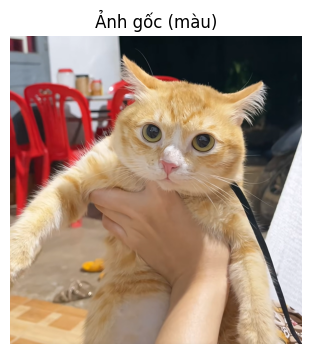

In [2]:
img = cv2.imread("cat.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(4,4))
plt.imshow(img)
plt.title("Ảnh gốc (màu)")
plt.axis("off")
plt.show()

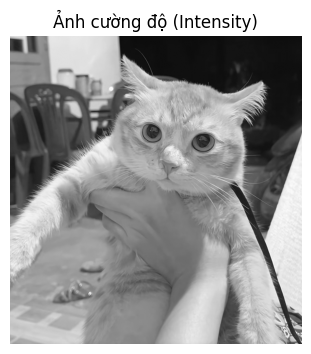

In [3]:
intensity = (
    0.299 * img[:,:,0] +
    0.587 * img[:,:,1] +
    0.114 * img[:,:,2]
).astype(np.uint8)

plt.figure(figsize=(4,4))
plt.imshow(intensity, cmap='gray')
plt.title("Ảnh cường độ (Intensity)")
plt.axis("off")
plt.show()
# Chuyển đổi ảnh RGB sang ảnh cường độ (Intensity)

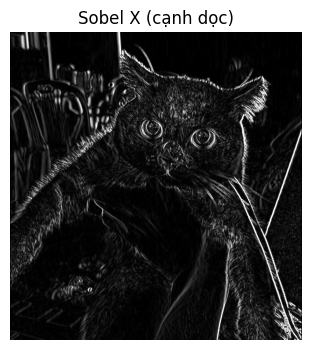

In [4]:
# Áp dụng bộ lọc Sobel theo hướng X để phát hiện cạnh dọc
sobel_x = cv2.Sobel(intensity, cv2.CV_64F, 1, 0, ksize=3)
sobel_x = np.absolute(sobel_x)
sobel_x = np.clip(sobel_x, 0, 255).astype(np.uint8)

plt.figure(figsize=(4,4))
plt.imshow(sobel_x, cmap='gray')
plt.title("Sobel X (cạnh dọc)")
plt.axis("off")
plt.show()


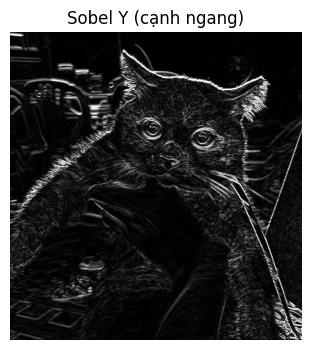

In [5]:
# Áp dụng bộ lọc Sobel theo hướng Y để phát hiện cạnh ngang
sobel_y = cv2.Sobel(intensity, cv2.CV_64F, 0, 1, ksize=3)
sobel_y = np.absolute(sobel_y)
sobel_y = np.clip(sobel_y, 0, 255).astype(np.uint8)

plt.figure(figsize=(4,4))
plt.imshow(sobel_y, cmap='gray')
plt.title("Sobel Y (cạnh ngang)")
plt.axis("off")
plt.show()


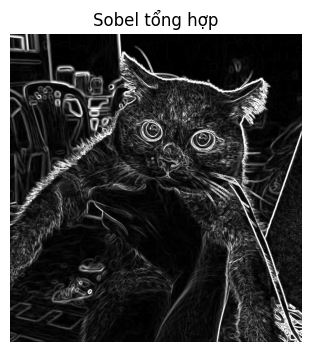

In [6]:
# Tính độ lớn cạnh tổng hợp từ Sobel X và Sobel Y
sobel_mag = np.sqrt(sobel_x.astype(np.float32)**2 + sobel_y.astype(np.float32)**2)
sobel_mag = np.clip(sobel_mag, 0, 255).astype(np.uint8)

plt.figure(figsize=(4,4))
plt.imshow(sobel_mag, cmap='gray')
plt.title("Sobel tổng hợp")
plt.axis("off")
plt.show()


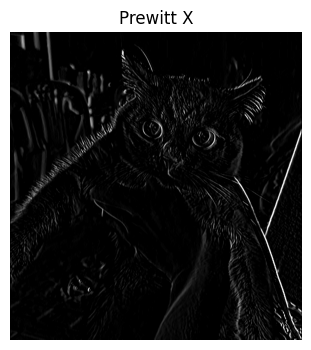

In [7]:
# Áp dụng bộ lọc Prewitt theo hướng X để phát hiện cạnh dọc
kernel_prewitt_x = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
])

prewitt_x = cv2.filter2D(intensity, -1, kernel_prewitt_x)

plt.figure(figsize=(4,4))
plt.imshow(prewitt_x, cmap='gray')
plt.title("Prewitt X")
plt.axis("off")
plt.show()


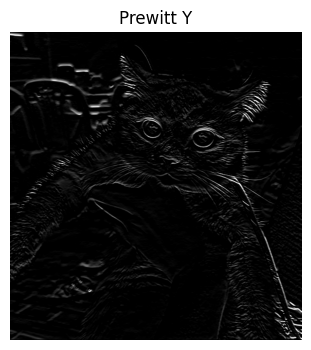

In [8]:
# Áp dụng bộ lọc Prewitt theo hướng Y để phát hiện cạnh ngang
kernel_prewitt_y = np.array([
    [ 1,  1,  1],
    [ 0,  0,  0],
    [-1, -1, -1]
])

prewitt_y = cv2.filter2D(intensity, -1, kernel_prewitt_y)

plt.figure(figsize=(4,4))
plt.imshow(prewitt_y, cmap='gray')
plt.title("Prewitt Y")
plt.axis("off")
plt.show()


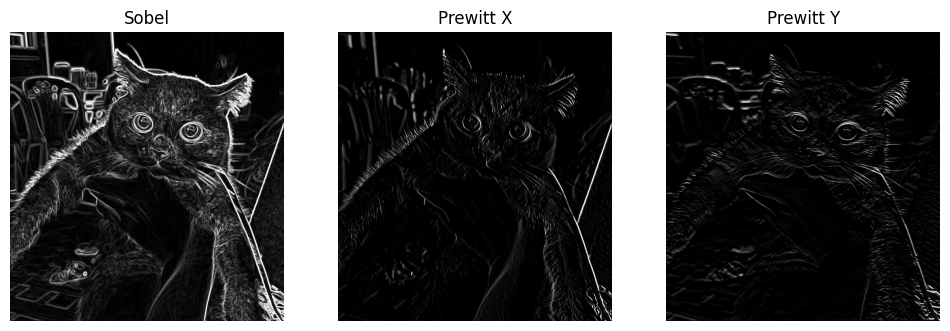

In [9]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(sobel_mag, cmap='gray')
plt.title("Sobel")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(prewitt_x, cmap='gray')
plt.title("Prewitt X")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(prewitt_y, cmap='gray')
plt.title("Prewitt Y")
plt.axis("off")

plt.show()
